In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape

(13320, 9)

In [5]:
data.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#Data clean: handle null values
data = data.dropna()

In [8]:
data.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
#drop availability because it's not required 
data = data.drop('availability',axis=1)

In [10]:
data.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi',
       'Lingadheeranahalli', 'Whitefield', '7th Phase JP Nagar',
       'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Ramakrishnappa Layout', 'Binny Pete',
       'Thanisandra', ' Thanisandra', 'Electronic City',
       'Ramagondanahalli', 'Yelahanka', 'Hebbal', 'Kanakpura Road',
       'Kundalahalli', 'Sarjapur  Road', 'Ganga Nagar', 'Doddathoguru',
       'Adarsh Nagar', 'Bhoganhalli', 'Lakshminarayana Pura',
       'Begur Road', 'Varthur', 'Gunjur', 'Hegde Nagar', 'Haralur Road',
       'Hennur Road', 'Cholanayakanahalli', 'Kodanda Reddy Layout',
       'EPIP Zone', 'Dasanapura', 'Kasavanhalli', 'Sanjay nagar',
       'Kengeri', 'Yeshwanthpur', 'Chandapura', 'Kothanur',
       'Green View Layout', 'Shantiniketan Layout', 'Rajaji Nagar',
       'Devanahalli', 'Byatarayanapura', 'Akshaya Nagar',
       'LB Shastri Nagar', 'Hormavu', 'Peenya', 'Kudlu Gate',
       '8th Phase JP Nagar', 'Chandra Layout

In [11]:
len(data.location.unique())

634

In [12]:
location_count = data.groupby('location').size().sort_values(ascending=False)
location_count

location
Whitefield                        397
Sarjapur  Road                    310
Electronic City                   236
Kanakpura Road                    216
Thanisandra                       212
                                 ... 
Kalhalli                            1
 Bhoganhalli                        1
KSRTC Layout                        1
KR Garden                           1
Yeshwanthpur Industrial Suburb      1
Length: 634, dtype: int64

In [13]:
len(location_count[location_count<=10])

491

In [14]:
location_less_10 = location_count[location_count<=10]

In [15]:
#if the location have less than 10 or 10 houses than that location are known as other location
data.location = data.location.apply(lambda x: 'other' if x in location_less_10 else x)

In [16]:
len(data.location.unique())

144

In [17]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique() 

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7])

In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data.total_sqft = data.total_sqft.apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,Prrry M,2785.0,5.0,3.0,295.00,4


In [20]:
#drop society column because it's not required
data = data.drop('society',axis=1)

In [21]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4


In [22]:
#create new column price_sqft that contain price per sqft
data['price_sqft'] = data.price*100000/data.total_sqft

In [23]:
#remove outlier using standard deviation
upper_limit = data.price_sqft.mean() + data.price_sqft.std()
lower_limit = data.price_sqft.mean() - data.price_sqft.std()
data = data[data.price_sqft<upper_limit] 
data = data[data.price_sqft > lower_limit]

In [24]:
#remove 2BHK house that price per sqft is less than the mean of 1bhk house price
def remove_bhk_outliers(data):
    exclude_indices = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_sqft),
                'std': np.std(bhk_df.price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_sqft<(stats['mean'])].index.values)
    return data.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)

In [25]:
data = data.drop('price_sqft',axis=1)

In [26]:
#apply one hot encoding in location column
dummies = pd.get_dummies(data.location)
location_cat = pd.get_dummies(data.location)
dummies.head()

,1st Phase JP Nagar,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


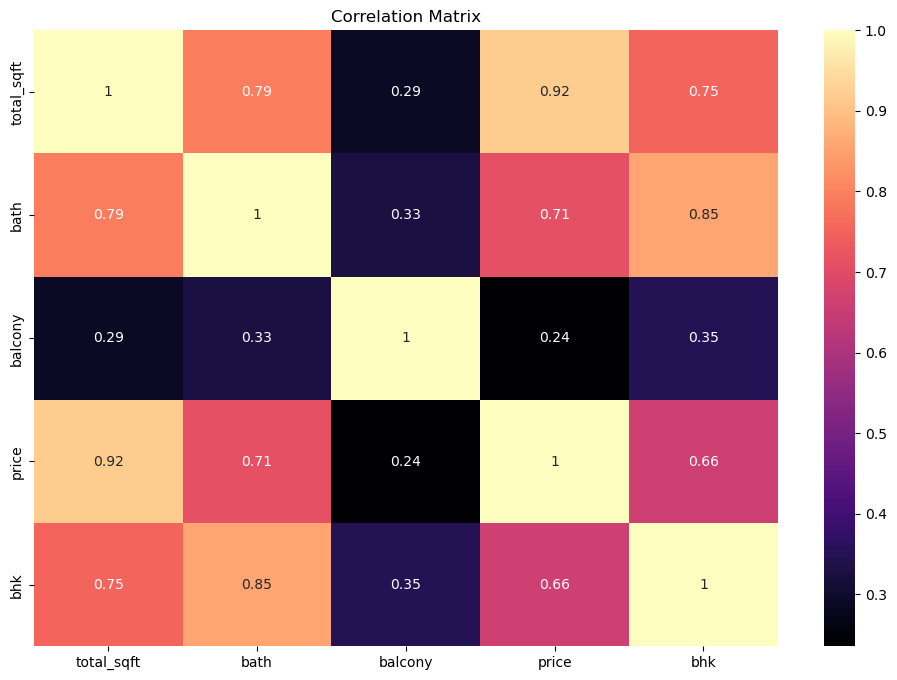

In [27]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = numeric_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()


In [28]:

data = pd.concat([data,dummies.drop('1st Phase JP Nagar',axis='columns')],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,False,False,...,False,False,False,False,False,False,False,False,False,False
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,False,False,...,False,False,False,False,False,True,False,False,False,False
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,False,True,...,False,False,False,False,False,False,False,False,False,False


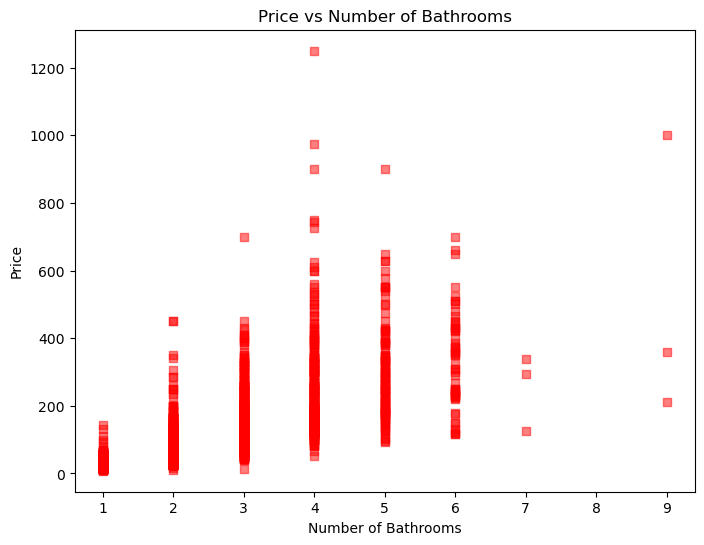

In [29]:
# Scatter plot between price and bath
plt.figure(figsize=(8, 6))
plt.scatter(data.bath, data.price, c='r', marker='s', alpha=0.5)
plt.title('Price vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()


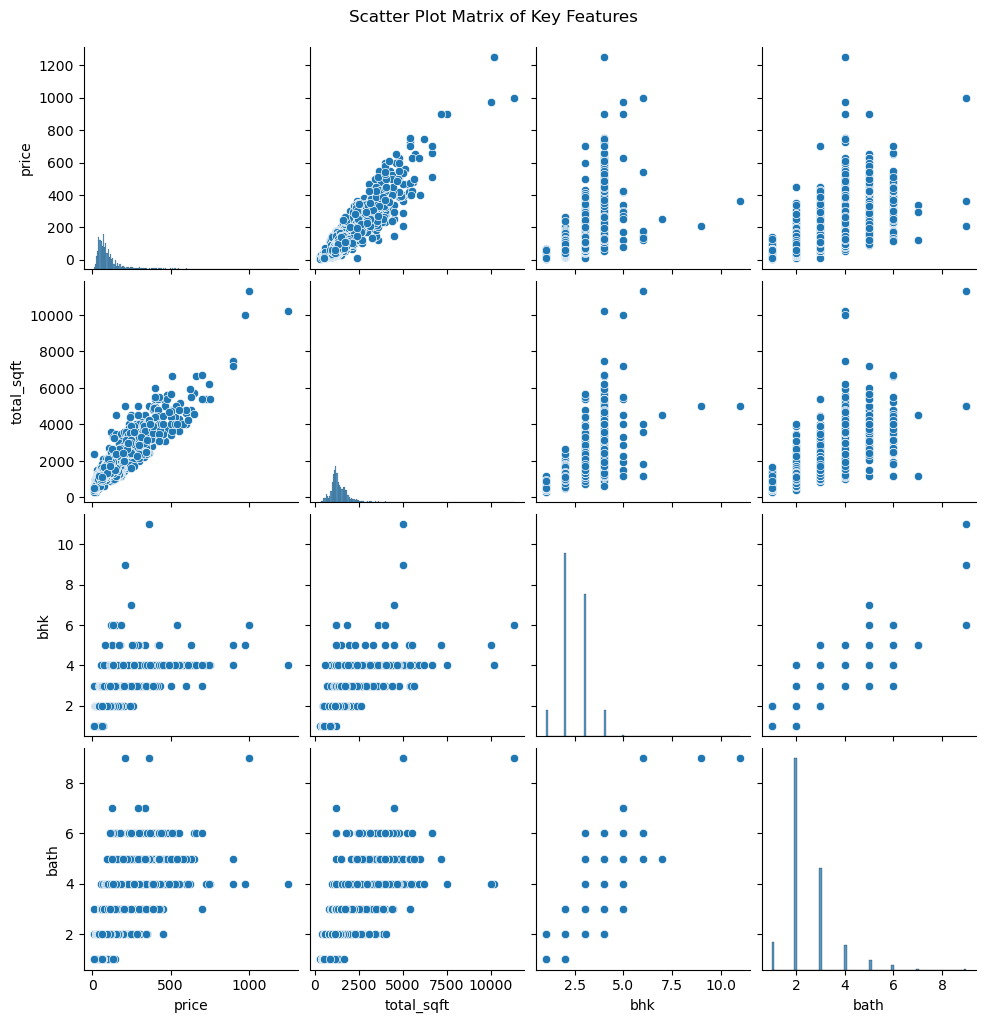

In [30]:
# Select numeric columns for visualization
numeric_data = data[['price', 'total_sqft', 'bhk', 'bath']]

# Pairplot for scatter plots between all numeric columns
sns.pairplot(numeric_data)
plt.suptitle('Scatter Plot Matrix of Key Features', y=1.02)
plt.show()


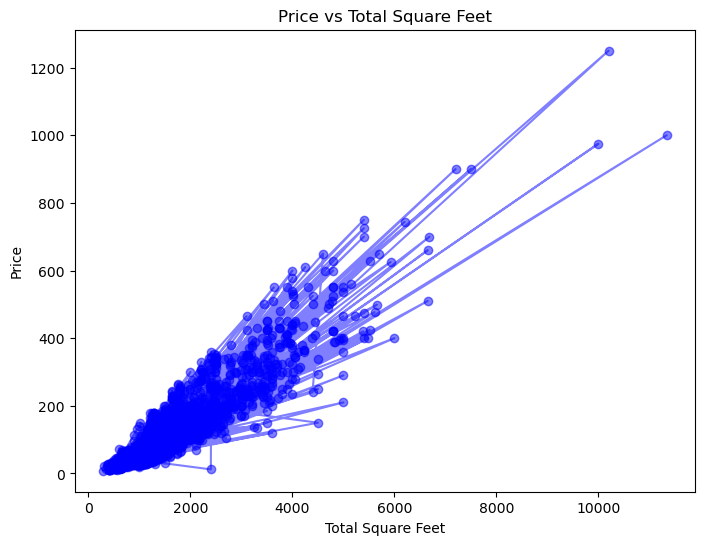

In [31]:
# Scatter plot between price and total_sqft
plt.figure(figsize=(8, 6))
plt.plot(data.total_sqft, data.price, c='b', marker='o', alpha=0.5)
plt.title('Price vs Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

In [32]:
#apply one hot encoding in area column
dummies = pd.get_dummies(data.area_type)
dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,False,False,False,True
1,False,False,True,False
3,False,False,False,True
11,False,False,True,False
12,False,False,False,True


In [33]:
data = pd.concat([data,dummies],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,False,False,...,False,False,False,False,False,False,False,False,True,False
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,False,False,...,False,False,False,False,False,False,False,False,False,True
11,Plot Area,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,False,False,...,False,True,False,False,False,False,False,False,True,False
12,Super built-up Area,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2,False,True,...,False,False,False,False,False,False,False,False,False,True


In [34]:
data = data.drop(['location','size','area_type'] , axis=1)

In [35]:
data.head()

,total_sqft,bath,balcony,price,bhk,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2600.0,5.0,3.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1521.0,3.0,1.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11,2785.0,5.0,3.0,295.00,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
12,1000.0,2.0,1.0,38.00,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [36]:
#split data into dependent feature & independent feature
X = data.drop('price',axis=1)

In [37]:
y=data['price']

In [38]:
#split data into train-test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
regressor = cross_val_score(LinearRegression(), X, y, cv=cv)
regressor

array([0.90264951, 0.89014555, 0.86736688, 0.89276874, 0.87845573])

In [39]:
np.average(regressor)

0.886277283344017

In [40]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.3)

In [41]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [42]:
y_pred = model.predict(x_test)


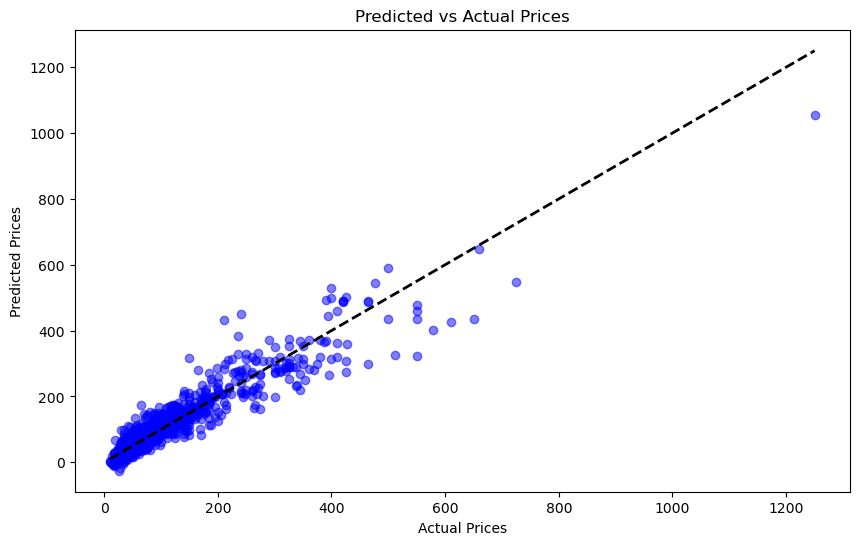

In [43]:
# Plot for Predicted vs Actual Prices
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')

plt.show()


In [44]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

18.66919296632745
942.6959915199387
30.70335472745509


/var/folders/63/gfgyqz0s19d0np85bch0z7k00000gn/T/ipykernel_79014/1388578081.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


Text(0, 0.5, 'Feature')

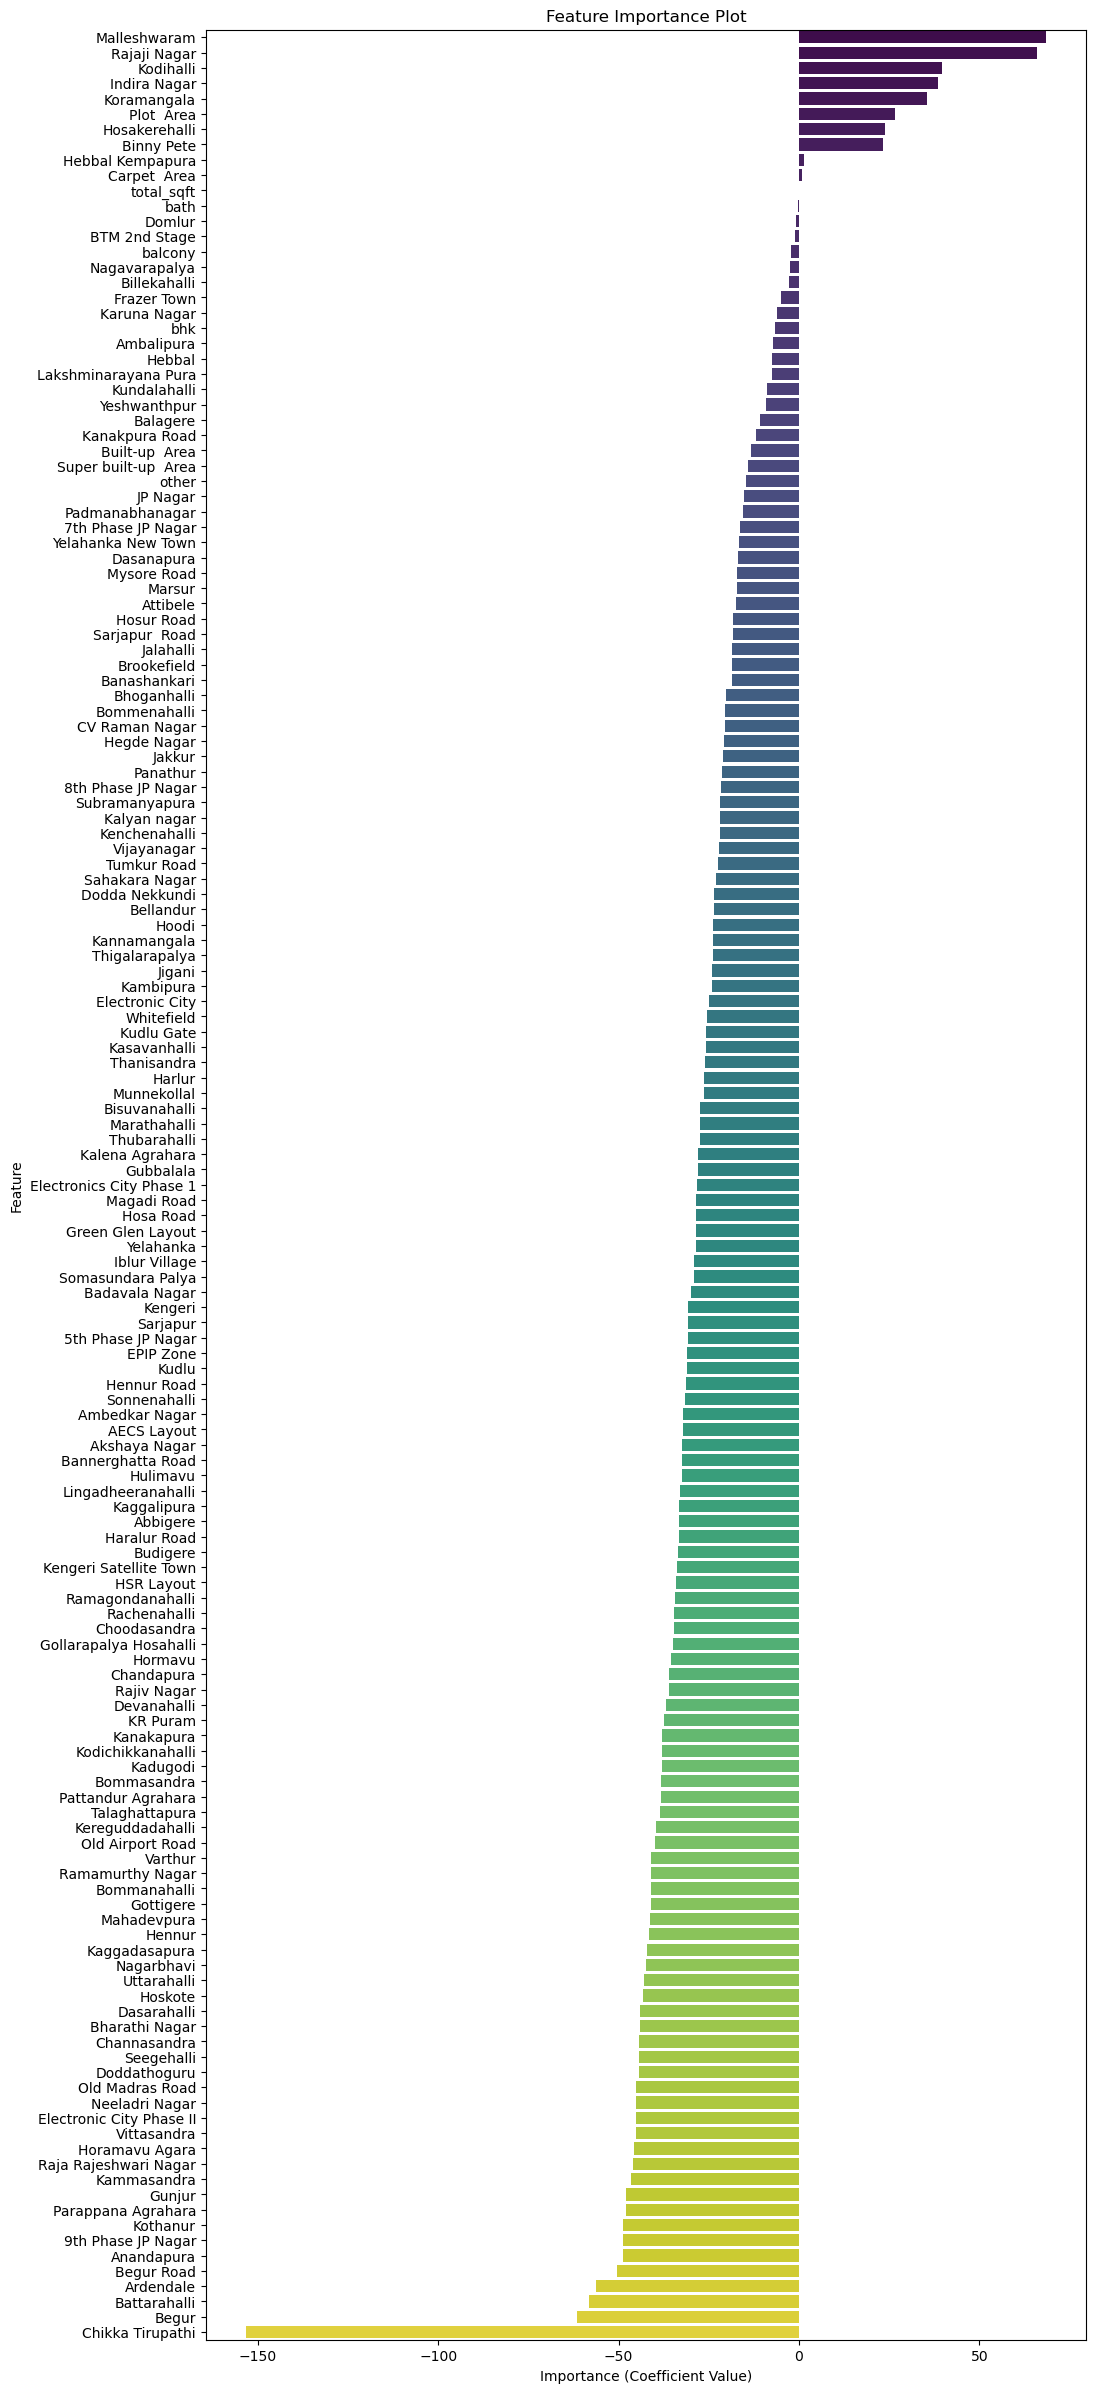

In [128]:
# Feature Importance Plot
feature_importance = model.coef_
feature_names = X.columns

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Create visualizations
plt.figure(figsize=(25, 30))

# Feature Importance Plot
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance Plot')
plt.xlabel('Importance (Coefficient Value)')
plt.ylabel('Feature')




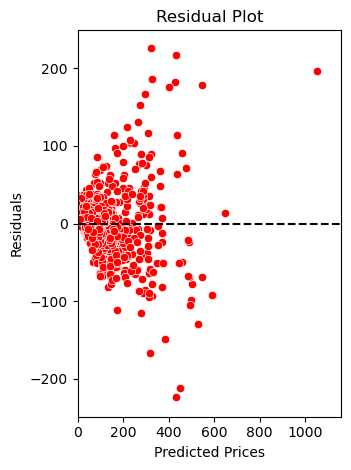

In [118]:
# Residual Plot
residuals = y_test - y_pred
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals, color='r')
plt.axhline(0, linestyle='--', color='black')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.xlim([0, max(y_pred) * 1.1])
plt.ylim([-max(abs(residuals)) * 1.1, max(abs(residuals)) * 1.1])

plt.tight_layout()
plt.show()

In [45]:
#save the model
import pickle
with open('model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

In [46]:
cat = data.drop(['price'] , axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)  

In [47]:
#save the column name
location_list = list(zip(location_cat.columns,range(cat.shape[1])))

In [48]:
with open('location_cat', 'wb') as fid:
    pickle.dump(location_list, fid,2)  

In [49]:
def predict(location,area,size,bath,balcony,total_sqft):
    output = np.zeros(151)
    output[0] = total_sqft
    output[1] = bath
    output[2] = balcony
    output[3] = size
    
    result_location = location
    if result_location not in location_cat:
        output[146] = 1
    else:
        output[index_dict[str(location)]] = 1
    
    return model.predict([output])[0]

In [50]:
#(location , area_type , size , bath , balcony , total_sqft)
predict('Yelahanka','Carpet Area', 3, 3, 2 ,3000)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


264.85382576890845

In [51]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 2 ,3560)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


343.7054746530695

In [52]:
predict('Yelahanka New Town' , 'Carpet Area' , 3 , 4 , 2 ,4000)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


382.50750521360067

In [53]:
predict('Yeshwanthpur' , 'Carpet Area' , 3 , 3 , 3 ,2550)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


234.45849320175606

In [54]:
predict('rajkot' , 'Carpet Area' , 3 , 3 , 3 ,2550)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


229.00597440499277